## KNN的基本实现

思考: 如何对电影进行分类预测

假设电影分为两类:
- 动作电影
- 爱情电影

 建模实现

目标: 对电影分类预测

电影的哪些属性对电影的类别有影响:

[建模]首先就要考虑哪些属性对我们研究的目标是有可能有影响的
1. 打斗镜头的次数
2. 接吻镜头的次数

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 导入相关库

In [4]:
pd.read_csv('../testFile/sklearn/movie.csv')#导入数据集

,电影名称,打斗镜头,接吻镜头,类别
0,黄飞鸿,10,2,动作
1,泰坦尼克,3,9,爱情
2,钢铁侠,12,3,动作
3,后会无期,4,10,爱情
4,星语心愿,1,8,爱情
5,通天教主,9,1,动作
6,加勒比海盗,11,2,动作
7,天下无贼,13,3,动作
8,同桌的你,2,7,爱情
9,天气之子,3,11,爱情


In [6]:
data = pd.read_csv('../testFile/sklearn/movie.csv')
y = data["类别"]
X = data[["打斗镜头","接吻镜头"]]
#数据分类

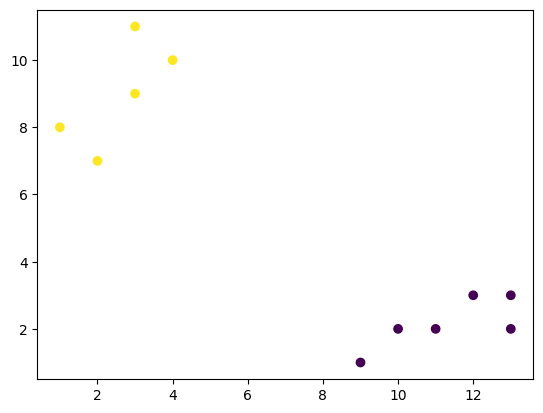

In [7]:
#特征空间: 由样本集的数据的特征展开的空间
X#二维特征空间
plt.scatter(X["打斗镜头"],X["接吻镜头"],c=y.map({"动作":0,"爱情":1}))#画散点图,并标记颜色
plt.show()

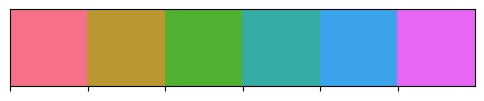

In [8]:
#从sns的调色板里获取好看的颜色
colors = sns.color_palette('husl')
sns.palplot(colors)

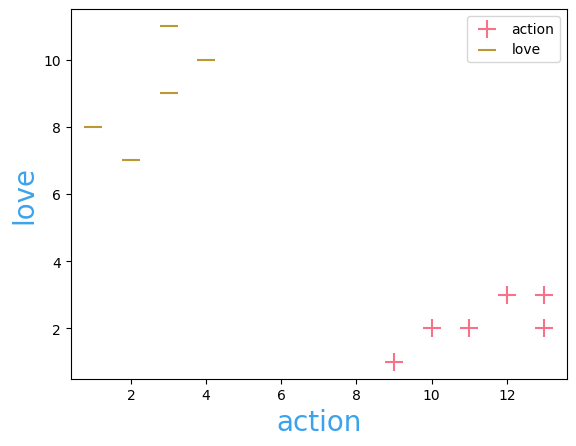

In [9]:
#更高级的操作
action = X.loc[y=="动作"]
love = X.loc[y=="爱情"]
plt.scatter(action["打斗镜头"],action["接吻镜头"],marker='+',s=180,color=colors[0],label="action")
plt.scatter(love["打斗镜头"],love["接吻镜头"],marker='_',s=180,color=colors[1],label="love")
plt.legend()
plt.xlabel("action",color=colors[-2],fontsize=20)
plt.ylabel("love",color=colors[-2],fontsize=20)
plt.show()

在特征空间中,我们发现相似的东西距离较近

我们可以根据在特征空间中,两个样本的距离,来对样本进行分类预测

In [12]:
from sklearn.neighbors import KNeighborsClassifier #导入knn分类

In [22]:
knn = KNeighborsClassifier(n_neighbors=7)#n_neighbors是k值的个数,分类问题一般k是奇数
#算法对象需要被训练,才具备预测能力
target = y.map({"动作":0,"爱情":1})#标签数值化处理
target

0     0
1     1
2     0
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    0
Name: 类别, dtype: int64

In [23]:
knn.fit(X,target)

KNeighborsClassifier(n_neighbors=7)

In [25]:
film = [[10,50],[6,12],[15,5]]
knn.predict(film)#预测

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 0], dtype=int64)